In [28]:
import numpy as np
from matplotlib import pyplot as plt

L = [10,20,30,40,50]
masses = np.array(L)
locations = np.array([0,1,2,3,4])

center_of_mass = np.sum(masses*locations)/np.sum(masses)
print(center_of_mass)






2.6666666666666665


In [ ]:
# look at spots image
spots = np.loadtxt('spots.txt')
ref = np.loadtxt('reference.txt')
ref_x = ref[:,0]
ref_y = ref[:,1]

In [ ]:
print(ref.shape)
plt.figure(figsize=(10,10))
plt.imshow(spots,cmap='gray')
plt.show()

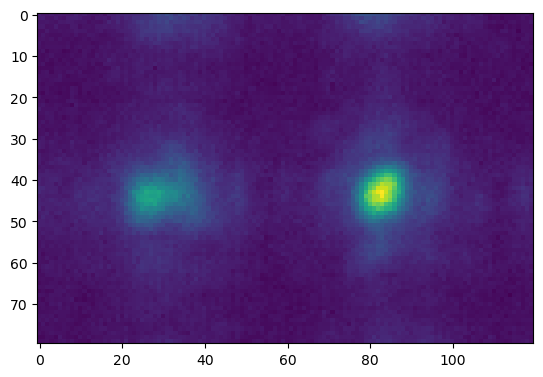

In [6]:
plt.figure()
plt.imshow(spots[1160:1240,800:920])

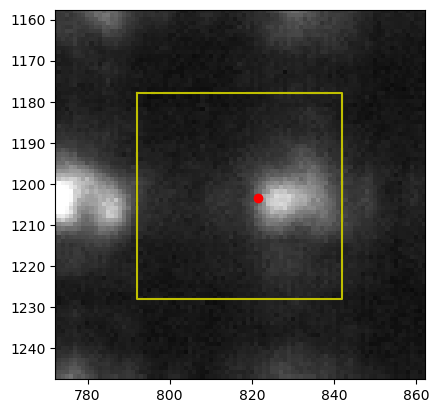

In [41]:
# y values are identical because they're from pseudocalibration
x1,y1 = 817.113,1202.596
x2,y2 = 871.659,1202.596

def centroid(spots,x,y,half_width=25):
    x1 = np.round(x - half_width).astype(np.int16)
    x2 = np.round(x + half_width).astype(np.int16)
    y1 = np.round(y - half_width).astype(np.int16)
    y2 = np.round(y + half_width).astype(np.int16)

    x_num = 0
    y_num = 0
    x_denom = 0
    y_denom = 0

    x0 = x
    y0 = y
    
    for x in range(x1,x2+1):
        for y in range(y1,y2+1):
            pixel = spots[y,x]
            x_num+=pixel*x
            y_num+=pixel*y
            x_denom+=pixel
            y_denom+=pixel
            
    xcom,ycom = x_num/x_denom,y_num/y_denom

    plt.figure()
    #plt.imshow(spots[1160:1240,800:920])

    plt.imshow(spots,cmap='gray',clim=(0,500))
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],'y-')
    plt.xlim((x0-half_width-20,x0+half_width+20))
    plt.ylim((y0+half_width+20,y0-half_width-20))
    plt.plot(xcom,ycom,'ro')
    
    return xcom,ycom    

xcom,ycom = centroid(spots,x1,y1)




    

